You have now learned to decompose a time series into seasonal and trend components and to use time series to forecast into the future using statsmodels. In this activity, your goal is to identify a new (to you) time series dataset and build a forecast using a seasonal and trend additive or multiplicative model using statsmodels.

Summarize your findings in an executive brief that explores the following:

- Data description: Provide a high-level overview of your data and its timeframe along with general information on your dataset
- Forecast: Give a description of the forecast. Describe the period that was projected and what the forecast implies about your data. Be sure to include presentation-ready plots with appropriate labels and titles.
- Uncertainty: Discuss the evaluation of your model on testing data, and explore the residuals. Discuss the consequence of this error for your model and forecasts. Is there still structure to uncover?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm


In [6]:
cpi = pd.read_csv('data/cpi.csv')
cpi['Date'] = pd.to_datetime(cpi['Date'])
cpi = cpi.set_index('Date')
cpi.head()

,Value
Date,
1948-01-01,10.2
1948-02-01,9.5
1948-03-01,6.8
1948-04-01,8.3
1948-05-01,9.4


In [12]:
y_hist = cpi[:'2014-01-01']
y_future = cpi['2014-01-01':]

print('Historical:')
print(y_hist.tail())
print('=========\nFuture:')
print(y_future.head())

Historical:
            Value
Date             
2013-09-01    1.1
2013-10-01    0.9
2013-11-01    1.2
2013-12-01    1.5
2014-01-01    1.6
Future:
            Value
Date             
2014-01-01    1.6
2014-02-01    1.1
2014-03-01    1.6
2014-04-01    2.0
2014-05-01    2.2


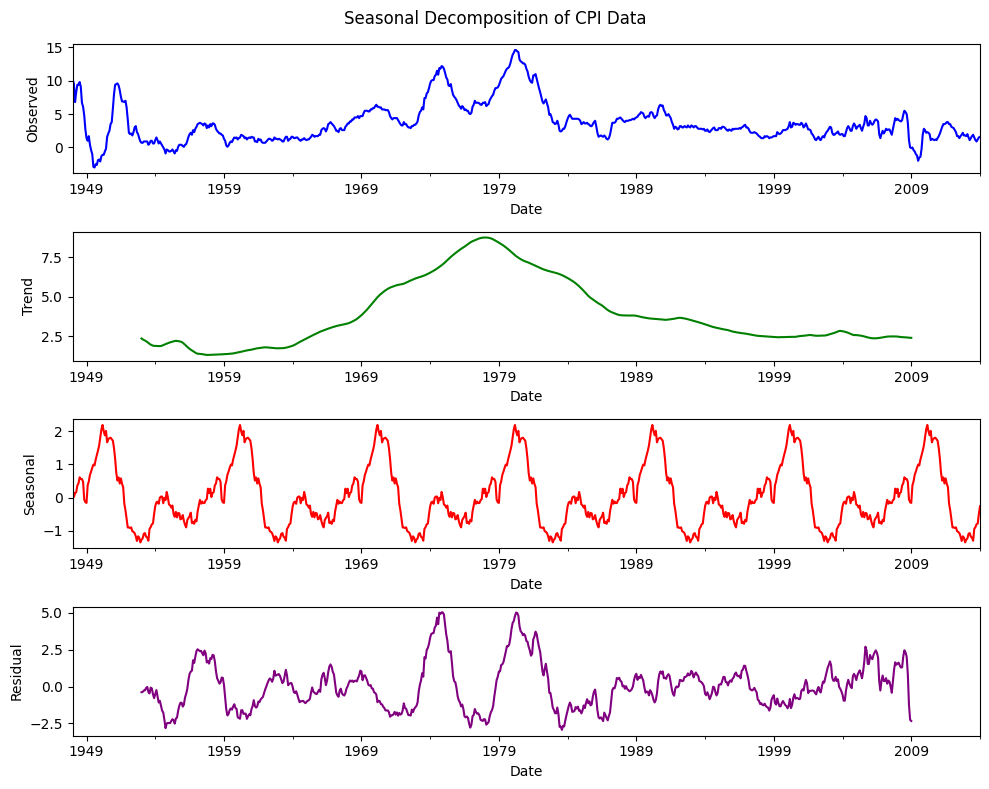

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply seasonal decomposition
decomposition = seasonal_decompose(y_hist['Value'], model='additive', period=120)

# Plot the decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

# Customize colors for each plot line
colors = ['blue', 'green', 'red', 'purple']

decomposition.observed.plot(ax=ax1, color=colors[0])
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2, color=colors[1])
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3, color=colors[2])
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4, color=colors[3])
ax4.set_ylabel('Residual')

#set title of graph
plt.suptitle('Seasonal Decomposition of CPI Data')
plt.tight_layout()
plt.show()